# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import files
fname1 = 'C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Data/emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Data/CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
#pd.set_option('display.max_rows', None)

#SMALL_SIZE = 10
#MEDIUM_SIZE = 15
#LARGE_SIZE = 20

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

# create new dataframes for each subgroup
geophysical_data = data[data['Disaster Subgroup'] == 'Geophysical']

# count number of disasters in each year for each subgroup
geophysical_disaster_counts = geophysical_data['Year'].value_counts().sort_index()

# save index of years
geophysical_disaster_counts_index = geophysical_disaster_counts.index

# sum costs by year
geophysical_costs = geophysical_data[['Year', 'Total Damages']]
geophysical_costs = geophysical_costs.groupby('Year').sum()
geophysical_costs = geophysical_costs.squeeze()

# SPLIT GEOPHYSICAL DISASTERS

In [4]:
# display unique types
for dtype in geophysical_data['Disaster Type'].unique():
    print(dtype)

Earthquake
Volcanic activity


In [5]:
# create new dataframes for each type
earthquake_data = geophysical_data[geophysical_data['Disaster Type'] == 'Earthquake']
volcanic_data = geophysical_data[geophysical_data['Disaster Type'] == 'Volcanic activity']

# count number of disasters in each year for each subgroup
earthquake_disaster_counts = earthquake_data['Year'].value_counts().sort_index()
volcanic_disaster_counts = volcanic_data['Year'].value_counts()
volcanic_disaster_counts[2016] = 0
volcanic_disaster_counts = volcanic_disaster_counts.sort_index()
# save index of years
earthquake_disaster_counts_index = earthquake_disaster_counts.index
volcanic_disaster_counts_index = volcanic_disaster_counts.index

# GEOPHYSICAL DISASTER OCCURRENCE ANALYSIS

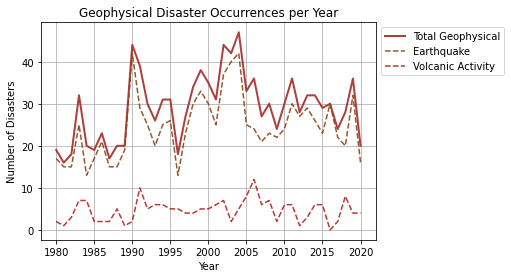

In [6]:
# GEOPHYSICAL DISASTER OCCURRENCE SINGLE LINE PLOT

plt.grid(axis = 'both')
plt.title("Geophysical Disaster Occurrences per Year")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.plot(geophysical_disaster_counts_index,geophysical_disaster_counts, linewidth=2, color = 'brown', alpha = 0.9, label = 'Total Geophysical')
plt.plot(earthquake_disaster_counts_index, earthquake_disaster_counts, linestyle = '--', color = 'saddlebrown', alpha = 0.9, label = 'Earthquake')
plt.plot(volcanic_disaster_counts_index, volcanic_disaster_counts, linestyle = '--', color = 'firebrick', alpha = 0.9, label = 'Volcanic Activity')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/geophysicalDisastersPerYearSLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

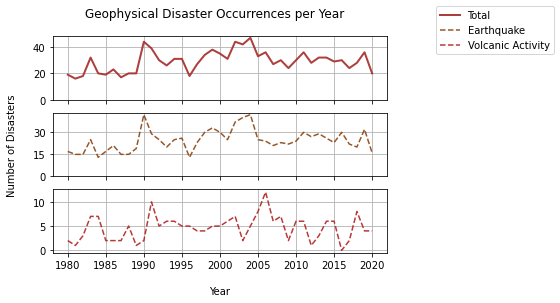

In [7]:
# GEOPHYSICAL DISASTER OCCURRENCE MULTIPLE LINE PLOTS

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Geophysical Disaster Occurrences per Year\n")
axs[1].set_ylabel("Number of Disasters\n")
axs[2].set_xlabel("\nYear")

axs[0].plot(geophysical_disaster_counts_index, geophysical_disaster_counts, linewidth=2, color = 'brown', alpha = 0.9, label = 'Total')
axs[1].plot(earthquake_disaster_counts_index, earthquake_disaster_counts, linestyle = '--', color = 'saddlebrown', alpha = 0.9, label = 'Earthquake')
axs[2].plot(volcanic_disaster_counts_index, volcanic_disaster_counts, linestyle = '--', color = 'firebrick', alpha = 0.9, label = 'Volcanic Activity')

plt.sca(axs[0])
plt.yticks(np.linspace(0,40,3))
plt.grid(axis = 'both')

plt.sca(axs[1])
plt.yticks(np.linspace(0,30,3))
plt.grid(axis = 'both')

plt.sca(axs[2])
plt.yticks(np.linspace(0,10,3))
plt.grid(axis = 'both')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/geophysicalDisastersPerYearMLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

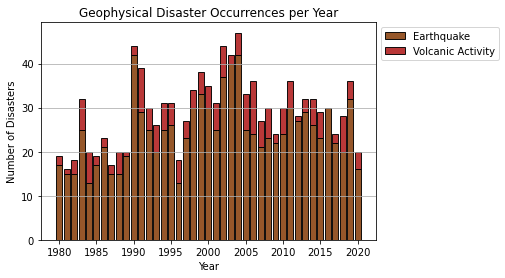

In [8]:
# GEOPHYSICAL DISASTER OCCURRENCE SINGLE BAR CHART

plt.grid(axis = 'y')
plt.title("Geophysical Disaster Occurrences per Year")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")

plt.bar(earthquake_disaster_counts_index, earthquake_disaster_counts, edgecolor = 'black', color = 'saddlebrown', alpha = 0.9, label = 'Earthquake')
plt.bar(volcanic_disaster_counts_index, volcanic_disaster_counts, bottom = earthquake_disaster_counts, edgecolor = 'black', color = 'firebrick', alpha = 0.9, label = 'Volcanic Activity')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/geophysicalDisastersPerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

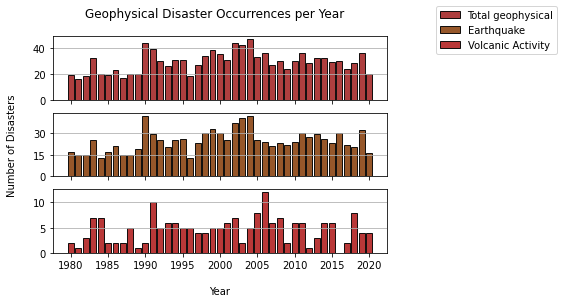

In [9]:
# GEOPHYSICAL DISASTER OCCURRENCE MULTIPLE BAR CHARTS

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Geophysical Disaster Occurrences per Year\n")
axs[1].set_ylabel("Number of Disasters\n")
axs[2].set_xlabel("\nYear")

axs[0].bar(geophysical_disaster_counts_index, geophysical_disaster_counts, edgecolor = 'black', color = 'brown', alpha = 0.9, label = 'Total geophysical')
axs[1].bar(earthquake_disaster_counts_index, earthquake_disaster_counts, edgecolor = 'black', color = 'saddlebrown', alpha = 0.9, label = 'Earthquake')
axs[2].bar(volcanic_disaster_counts_index, volcanic_disaster_counts, edgecolor = 'black', color = 'firebrick', alpha = 0.9, label = 'Volcanic Activity')

plt.sca(axs[0])
plt.yticks(np.linspace(0,40,3))
plt.grid(axis = 'y')

plt.sca(axs[1])
plt.yticks(np.linspace(0,30,3))
plt.grid(axis = 'y')

plt.sca(axs[2])
plt.yticks(np.linspace(0,10,3))
plt.grid(axis = 'y')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/geophysicalDisastersPerYearMBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

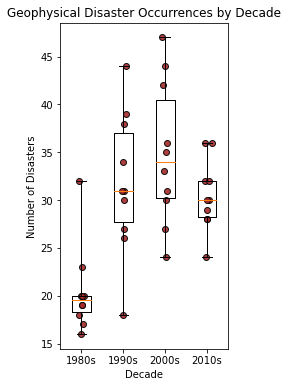

In [10]:
# GEOPHYSICAL DISASTER OCCURRENCE BOXPLOT

total_box_data = [geophysical_disaster_counts[0:10], geophysical_disaster_counts[10:20], geophysical_disaster_counts[20:30], geophysical_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Geophysical Disaster Occurrences by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'brown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'brown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'brown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'brown', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/geophysicalDisastersPerYearBOX.png", bbox_inches='tight')

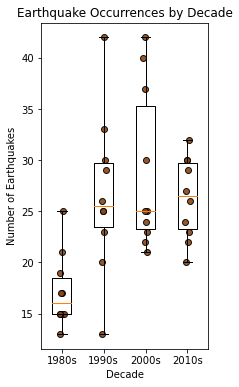

In [11]:
# EARTHQUAKE OCCURRENCE BOXPLOT

total_box_data = [earthquake_disaster_counts[0:10], earthquake_disaster_counts[10:20], earthquake_disaster_counts[20:30], earthquake_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Earthquake Occurrences by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Earthquakes")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/earthquakesPerYearBOX.png", bbox_inches='tight')

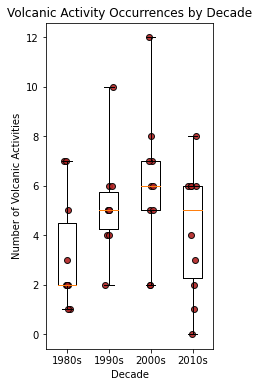

In [12]:
# VOLCANIC ACTIVITY OCCURRENCE BOXPLOT

total_box_data = [volcanic_disaster_counts[0:10], volcanic_disaster_counts[10:20], volcanic_disaster_counts[20:30], volcanic_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Volcanic Activity Occurrences by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Volcanic Activities")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'firebrick', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'firebrick', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'firebrick', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'firebrick', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/volcanicDisastersPerYearBOX.png", bbox_inches='tight')

# GEOPHYSICAL DISASTER OCCURRENCE STATISTICS

In [13]:
# GEOPHYSICAL DISASTER OCCURRENCE STATISTICS

print("GEOPHYSICAL DISASTER OCCURRENCE STATISTICS")

# geophysical disaster occurrence (total statistics)
print("\nGeophysical disaster occurrence (total statistics): ")
print(geophysical_disaster_counts.describe())

# geophysical disaster occurrence (1980s statistics)
print("\nGeophysical disaster occurrence (1980s statistics): ")
print(geophysical_disaster_counts[0:10].describe())

# geophysical disaster occurrence (1990s statistics)
print("\nGeophysical disaster occurrence (1990s statistics): ")
print(geophysical_disaster_counts[10:20].describe())

# geophysical disaster occurrence (2000s statistics)
print("\nGeophysical disaster occurrence (2000s statistics): ")
print(geophysical_disaster_counts[20:30].describe())

# geophysical disaster occurrence (2010s statistics)
print("\nGeophysical disaster occurrence (2010s statistics): ")
print(geophysical_disaster_counts[30:40].describe())

print("\n")

# GEOPHYSICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("GEOPHYSICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean yearly number of geophysical disasters (1980s-2010s)
geophysical_mean_1980s = geophysical_disaster_counts[0:10].mean()
geophysical_mean_2010s = geophysical_disaster_counts[30:40].mean()
mean_percent_change_geophysical_1980_to_2020 = 100*(geophysical_mean_2010s-geophysical_mean_1980s)/geophysical_mean_1980s
print("Change in mean yearly number of geophysical disasters (1980s-2010s): {:.2f}%".format(mean_percent_change_geophysical_1980_to_2020))

# change in maximum yearly number of geophysical disasters (1980s-2010s)
geophysical_max_1980s = geophysical_disaster_counts[0:10].max()
geophysical_max_2010s = geophysical_disaster_counts[30:40].max()
max_percent_change_geophysical_1980_to_2020 = 100*(geophysical_max_2010s-geophysical_max_1980s)/geophysical_max_1980s
print("Change in maximum yearly number of geophysical disasters (1980s-2010s): {:.2f}%".format(max_percent_change_geophysical_1980_to_2020))

# change in minimum yearly number of geophysical disasters (1980s-2010s)
geophysical_min_1980s = geophysical_disaster_counts[0:10].min()
geophysical_min_2010s = geophysical_disaster_counts[30:40].min()
min_percent_change_geophysical_1980_to_2020 = 100*(geophysical_min_2010s-geophysical_min_1980s)/geophysical_min_1980s
print("Change in minimum yearly number of geophysical disasters (1980s-2010s): {:.2f}%".format(min_percent_change_geophysical_1980_to_2020))

# change in standard deviation of yearly number of geophysical disasters (1980s-2010s)
geophysical_std_1980s = geophysical_disaster_counts[0:10].std()
geophysical_std_2010s = geophysical_disaster_counts[30:40].std()
std_percent_change_geophysical_1980_to_2020 = 100*(geophysical_std_2010s-geophysical_std_1980s)/geophysical_std_1980s
print("Change in standard deviation of yearly number of geophysical disasters (1980s-2010s): {:.2f}%\n".format(std_percent_change_geophysical_1980_to_2020))

GEOPHYSICAL DISASTER OCCURRENCE STATISTICS

Geophysical disaster occurrence (total statistics): 
count    41.000000
mean     29.170732
std       8.021541
min      16.000000
25%      23.000000
50%      30.000000
75%      34.000000
max      47.000000
Name: Year, dtype: float64

Geophysical disaster occurrence (1980s statistics): 
count    10.000000
mean     20.400000
std       4.501851
min      16.000000
25%      18.250000
50%      19.500000
75%      20.000000
max      32.000000
Name: Year, dtype: float64

Geophysical disaster occurrence (1990s statistics): 
count    10.000000
mean     31.800000
std       7.420692
min      18.000000
25%      27.750000
50%      31.000000
75%      37.000000
max      44.000000
Name: Year, dtype: float64

Geophysical disaster occurrence (2000s statistics): 
count    10.000000
mean     34.900000
std       7.489993
min      24.000000
25%      30.250000
50%      34.000000
75%      40.500000
max      47.000000
Name: Year, dtype: float64

Geophysical disaster occ

In [14]:
# EARTHQUAKE OCCURRENCE STATISTICS

print("EARTHQUAKE OCCURRENCE STATISTICS")

# earthquake occurrence (total statistics)
print("\nEarthquake occurrence (total statistics): ")
print(earthquake_disaster_counts.describe())

# earthquake occurrence (1980s statistics)
print("\nEarthquake occurrence (1980s statistics): ")
print(earthquake_disaster_counts[0:10].describe())

# earthquake occurrence (1990s statistics)
print("\nEarthquake occurrence (1990s statistics): ")
print(earthquake_disaster_counts[10:20].describe())

# earthquake occurrence (2000s statistics)
print("\nEarthquake occurrence (2000s statistics): ")
print(earthquake_disaster_counts[20:30].describe())

# earthquake occurrence (2010s statistics)
print("\nEarthquake occurrence (2010s statistics): ")
print(earthquake_disaster_counts[30:40].describe())

print("\n")

# EARTHQUAKE OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("EARTHQUAKE OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean yearly number of earthquakes (1980s-2010s)
earthquake_mean_1980s = earthquake_disaster_counts[0:10].mean()
earthquake_mean_2010s = earthquake_disaster_counts[30:40].mean()
mean_percent_change_earthquake_1980_to_2020 = 100*(earthquake_mean_2010s-earthquake_mean_1980s)/earthquake_mean_1980s
print("Change in mean yearly number of earthquakes (1980s-2010s): {:.2f}%".format(mean_percent_change_earthquake_1980_to_2020))

# change in maximum yearly number of earthquakes (1980s-2010s)
earthquake_max_1980s = earthquake_disaster_counts[0:10].max()
earthquake_max_2010s = earthquake_disaster_counts[30:40].max()
max_percent_change_earthquake_1980_to_2020 = 100*(earthquake_max_2010s-earthquake_max_1980s)/earthquake_max_1980s
print("Change in maximum yearly number of earthquakes (1980s-2010s): {:.2f}%".format(max_percent_change_earthquake_1980_to_2020))

# change in minimum yearly number of earthquakes (1980s-2010s)
earthquake_min_1980s = earthquake_disaster_counts[0:10].min()
earthquake_min_2010s = earthquake_disaster_counts[30:40].min()
min_percent_change_earthquake_1980_to_2020 = 100*(earthquake_min_2010s-earthquake_min_1980s)/earthquake_min_1980s
print("Change in minimum yearly number of earthquakes (1980s-2010s): {:.2f}%".format(min_percent_change_earthquake_1980_to_2020))

# change in standard deviation of yearly number of earthquakes (1980s-2010s)
earthquake_std_1980s = earthquake_disaster_counts[0:10].std()
earthquake_std_2010s = earthquake_disaster_counts[30:40].std()
std_percent_change_earthquake_1980_to_2020 = 100*(earthquake_std_2010s-earthquake_std_1980s)/earthquake_std_1980s
print("Change in standard deviation of yearly number of earthquakes (1980s-2010s): {:.2f}%\n".format(std_percent_change_earthquake_1980_to_2020))

EARTHQUAKE OCCURRENCE STATISTICS

Earthquake occurrence (total statistics): 
count    41.000000
mean     24.536585
std       7.476956
min      13.000000
25%      20.000000
50%      24.000000
75%      29.000000
max      42.000000
Name: Year, dtype: float64

Earthquake occurrence (1980s statistics): 
count    10.000000
mean     17.200000
std       3.583915
min      13.000000
25%      15.000000
50%      16.000000
75%      18.500000
max      25.000000
Name: Year, dtype: float64

Earthquake occurrence (1990s statistics): 
count    10.000000
mean     26.600000
std       7.763161
min      13.000000
25%      23.500000
50%      25.500000
75%      29.750000
max      42.000000
Name: Year, dtype: float64

Earthquake occurrence (2000s statistics): 
count    10.000000
mean     28.900000
std       7.894442
min      21.000000
25%      23.250000
50%      25.000000
75%      35.250000
max      42.000000
Name: Year, dtype: float64

Earthquake occurrence (2010s statistics): 
count    10.000000
mean     26.

In [15]:
# VOLCANIC ACTIVITY STATISTICS

print("VOLCANIC ACTIVITY STATISTICS")

# volcanic occurrence (total statistics)
print("\nVolcanic Activity (total statistics): ")
print(volcanic_disaster_counts.describe())

# volcanic occurrence (1980s statistics)
print("\nVolcanic Activity (1980s statistics): ")
print(volcanic_disaster_counts[0:10].describe())

# volcanic occurrence (1990s statistics)
print("\nVolcanic Activity (1990s statistics): ")
print(volcanic_disaster_counts[10:20].describe())

# volcanic occurrence (2000s statistics)
print("\nVolcanic Activity (2000s statistics): ")
print(volcanic_disaster_counts[20:30].describe())

# volcanic occurrence (2010s statistics)
print("\nVolcanic Activity (2010s statistics): ")
print(volcanic_disaster_counts[30:40].describe())

print("\n")

# VOLCANIC ACTIVITY STATISTICAL CHANGES (1980s-2010s)

print("VOLCANIC ACTIVITY STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean yearly number of volcanic activities (1980s-2010s)
volcanic_mean_1980s = volcanic_disaster_counts[0:10].mean()
volcanic_mean_2010s = volcanic_disaster_counts[30:40].mean()
mean_percent_change_volcanic_1980_to_2020 = 100*(volcanic_mean_2010s-volcanic_mean_1980s)/volcanic_mean_1980s
print("Change in mean yearly number of volcanic activities (1980s-2010s): {:.2f}%".format(mean_percent_change_volcanic_1980_to_2020))

# change in maximum yearly number of volcanic activities (1980s-2010s)
volcanic_max_1980s = volcanic_disaster_counts[0:10].max()
volcanic_max_2010s = volcanic_disaster_counts[30:40].max()
max_percent_change_volcanic_1980_to_2020 = 100*(volcanic_max_2010s-volcanic_max_1980s)/volcanic_max_1980s
print("Change in maximum yearly number of volcanic activities (1980s-2010s): {:.2f}%".format(max_percent_change_volcanic_1980_to_2020))

# change in minimum yearly number of volcanic activities (1980s-2010s)
volcanic_min_1980s = volcanic_disaster_counts[0:10].min()
volcanic_min_2010s = volcanic_disaster_counts[30:40].min()
min_percent_change_volcanic_1980_to_2020 = 100*(volcanic_min_2010s-volcanic_min_1980s)/volcanic_min_1980s
print("Change in minimum yearly number of volcanic activities (1980s-2010s): {:.2f}%".format(min_percent_change_volcanic_1980_to_2020))

# change in standard deviation of yearly number of volcanic activities (1980s-2010s)
volcanic_std_1980s = volcanic_disaster_counts[0:10].std()
volcanic_std_2010s = volcanic_disaster_counts[30:40].std()
std_percent_change_volcanic_1980_to_2020 = 100*(volcanic_std_2010s-volcanic_std_1980s)/volcanic_std_1980s
print("Change in standard deviation of yearly number of volcanic activities (1980s-2010s): {:.2f}%\n".format(std_percent_change_volcanic_1980_to_2020))

VOLCANIC ACTIVITY STATISTICS

Volcanic Activity (total statistics): 
count    41.000000
mean      4.634146
std       2.586079
min       0.000000
25%       2.000000
50%       5.000000
75%       6.000000
max      12.000000
Name: Year, dtype: float64

Volcanic Activity (1980s statistics): 
count    10.000000
mean      3.200000
std       2.299758
min       1.000000
25%       2.000000
50%       2.000000
75%       4.500000
max       7.000000
Name: Year, dtype: float64

Volcanic Activity (1990s statistics): 
count    10.000000
mean      5.200000
std       2.043961
min       2.000000
25%       4.250000
50%       5.000000
75%       5.750000
max      10.000000
Name: Year, dtype: float64

Volcanic Activity (2000s statistics): 
count    10.000000
mean      6.000000
std       2.905933
min       2.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      12.000000
Name: Year, dtype: float64

Volcanic Activity (2010s statistics): 
count    10.000000
mean      4.200000
std       2.61618

# YoY CHANGE IN GEOPHYSICAL DISASTER OCCURRENCE ANALYSIS

In [16]:
# CALCULATE YoY CHANGE IN GEOPHYSICAL DISASTER OCCURRENCES

geophysical_disaster_change = [geophysical_disaster_counts[i+1]-geophysical_disaster_counts[i] for i in range(1980,2020)]
geophysical_disaster_change = pd.Series(geophysical_disaster_change)

earthquake_disaster_change = [earthquake_disaster_counts[i+1]-earthquake_disaster_counts[i] for i in range(1980,2020)]
earthquake_disaster_change = pd.Series(earthquake_disaster_change)

volcanic_disaster_change = [volcanic_disaster_counts[i+1]-volcanic_disaster_counts[i] for i in range(1980,2020)]
volcanic_disaster_change = pd.Series(volcanic_disaster_change)

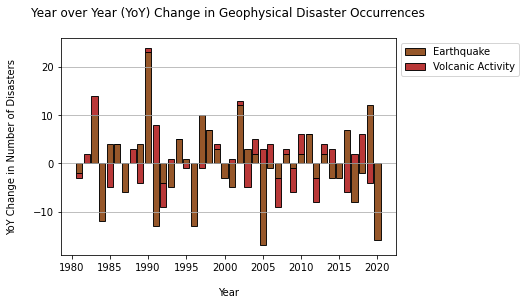

In [17]:
# single bar chart

change_data = np.array([earthquake_disaster_change, volcanic_disaster_change])

data_shape = np.shape(change_data)

# Take negative and positive data apart and cumulate
def get_cumulated_array(change_data, **kwargs):
    cum = change_data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(change_data))
    d[1:] = cum[:-1]
    return d  

cumulated_data = get_cumulated_array(change_data, min=0)
cumulated_data_neg = get_cumulated_array(change_data, max=0)

# Re-merge negative and positive data.
row_mask = (change_data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

cols = ["saddlebrown", "firebrick"]
labs = ["Earthquake", "Volcanic Activity"]

fig = plt.figure()
ax = plt.subplot(111)

for i in np.arange(0, data_shape[0]):
    ax.bar(range(1981, 2021), change_data[i], bottom=data_stack[i], edgecolor = 'black', color=cols[i], alpha = 0.9, label = labs[i])

plt.grid(axis = 'y')

plt.title("Year over Year (YoY) Change in Geophysical Disaster Occurrences\n")
plt.xlabel("\nYear")
plt.ylabel("YoY Change in Number of Disasters\n")

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/geophysicalDisasterChangePerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

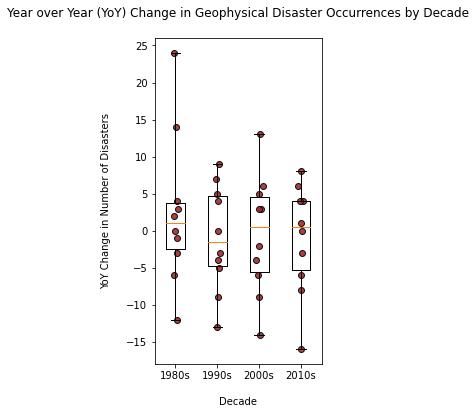

In [18]:
# YoY CHANGE IN GEOPHYSICAL DISASTER OCCURRENCES BOXPLOT

total_box_data = [geophysical_disaster_change[0:10], geophysical_disaster_change[10:20], geophysical_disaster_change[20:30], geophysical_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Geophysical Disaster Occurrences by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Number of Disasters\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'brown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'brown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'brown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'brown', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/geophysicalDisasterChangePerYearBOX.png", bbox_inches='tight')

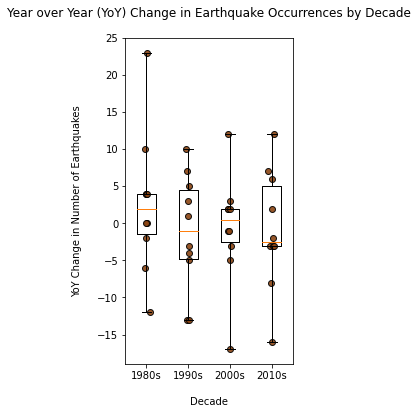

In [19]:
# YoY CHANGE IN EARTHQUAKE OCCURRENCES BOXPLOT

total_box_data = [earthquake_disaster_change[0:10], earthquake_disaster_change[10:20], earthquake_disaster_change[20:30], earthquake_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Earthquake Occurrences by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Number of Earthquakes\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/earthquakeChangePerYearBOX.png", bbox_inches='tight')

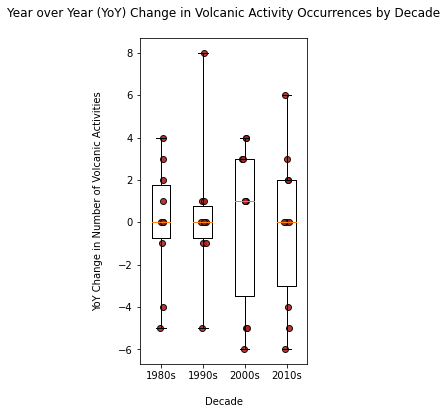

In [20]:
# YoY CHANGE IN VOLCANIC OCCURRENCES BOXPLOT

total_box_data = [volcanic_disaster_change[0:10], volcanic_disaster_change[10:20], volcanic_disaster_change[20:30], volcanic_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Volcanic Activity Occurrences by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Number of Volcanic Activities\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'firebrick', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'firebrick', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'firebrick', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'firebrick', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/volcanicChangePerYearBOX.png", bbox_inches='tight')

# YoY CHANGE IN GEOPHYSICAL DISASTER OCCURRENCE STATISTICS

In [21]:
# YoY CHANGE IN GEOPHYSICAL DISASTER OCCURRENCE STATISTICS

print("YoY CHANGE IN GEOPHYSICAL DISASTER OCCURRENCE STATISTICS")

# YoY change in geophysical disaster occurrence (total statistics)
print("\nYoY change in geophysical disaster occurrence (total statistics): ")
print(geophysical_disaster_change.describe())

# YoY change in geophysical disaster occurrence (1980s statistics)
print("\nYoY change in geophysical disaster occurrence (1980s statistics): ")
print(geophysical_disaster_change[0:10].describe())

# YoY change in geophysical disaster occurrence (1990s statistics)
print("\nYoY change in geophysical disaster occurrence (1990s statistics): ")
print(geophysical_disaster_change[10:20].describe())

# YoY change in geophysical disaster occurrence (2000s statistics)
print("\nYoY change in geophysical disaster occurrence (2000s statistics): ")
print(geophysical_disaster_change[20:30].describe())

# YoY change in geophysical disaster occurrence (2010s statistics)
print("\nYoY change in geophysical disaster occurrence (2010s statistics): ")
print(geophysical_disaster_change[30:40].describe())

print("\n")

# YoY CHANGE IN GEOPHYSICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN GEOPHYSICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in natural disaster occurrence (1980s-2010s)
total_mean_1980s = geophysical_disaster_change[0:10].mean()
total_mean_2010s = geophysical_disaster_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Change in mean YoY change in geophysical disaster occurrence (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

# change in maximum YoY change in natural disaster occurrence (1980s-2010s)
total_max_1980s = geophysical_disaster_change[0:10].max()
total_max_2010s = geophysical_disaster_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Change in maximum YoY change in geophysical disaster occurrence (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

# change in minimum YoY change in natural disaster occurrence (1980s-2010s)
total_min_1980s = geophysical_disaster_change[0:10].min()
total_min_2010s = geophysical_disaster_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Change in minimum YoY change in geophysical disaster occurrence (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in natural disaster occurrence (1980s-2010s)
total_std_1980s = geophysical_disaster_change[0:10].std()
total_std_2010s = geophysical_disaster_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Change in standard deviation YoY change in geophysical disaster occurrence (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

YoY CHANGE IN GEOPHYSICAL DISASTER OCCURRENCE STATISTICS

YoY change in geophysical disaster occurrence (total statistics): 
count    40.000000
mean      0.025000
std       8.071754
min     -16.000000
25%      -5.250000
50%       0.000000
75%       4.250000
max      24.000000
dtype: float64

YoY change in geophysical disaster occurrence (1980s statistics): 
count    10.000000
mean      2.500000
std      10.157099
min     -12.000000
25%      -2.500000
50%       1.000000
75%       3.750000
max      24.000000
dtype: float64

YoY change in geophysical disaster occurrence (1990s statistics): 
count    10.000000
mean     -0.900000
std       7.171704
min     -13.000000
25%      -4.750000
50%      -1.500000
75%       4.750000
max       9.000000
dtype: float64

YoY change in geophysical disaster occurrence (2000s statistics): 
count    10.000000
mean     -0.500000
std       8.017342
min     -14.000000
25%      -5.500000
50%       0.500000
75%       4.500000
max      13.000000
dtype: float64

Yo

In [22]:
# YoY CHANGE IN EARTHQUAKE OCCURRENCE STATISTICS

print("YoY CHANGE IN EARTHQUAKE DISASTER OCCURRENCE STATISTICS")

# YoY change in earthquake disaster occurrence (total statistics)
print("\nYoY change in earthquake disaster occurrence (total statistics): ")
print(earthquake_disaster_change.describe())

# YoY change in earthquake disaster occurrence (1980s statistics)
print("\nYoY change in earthquake disaster occurrence (1980s statistics): ")
print(earthquake_disaster_change[0:10].describe())

# YoY change in earthquake disaster occurrence (1990s statistics)
print("\nYoY change in earthquake disaster occurrence (1990s statistics): ")
print(earthquake_disaster_change[10:20].describe())

# YoY change in earthquake disaster occurrence (2000s statistics)
print("\nYoY change in earthquake disaster occurrence (2000s statistics): ")
print(earthquake_disaster_change[20:30].describe())

# YoY change in earthquake disaster occurrence (2010s statistics)
print("\nYoY change in earthquake disaster occurrence (2010s statistics): ")
print(earthquake_disaster_change[30:40].describe())

print("\n")

# YoY CHANGE IN EARTHQUAKE DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN EARTHQUAKE DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in natural disaster occurrence (1980s-2010s)
total_mean_1980s = earthquake_disaster_change[0:10].mean()
total_mean_2010s = earthquake_disaster_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Change in mean YoY change in earthquake disaster occurrence (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

# change in maximum YoY change in natural disaster occurrence (1980s-2010s)
total_max_1980s = earthquake_disaster_change[0:10].max()
total_max_2010s = earthquake_disaster_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Change in maximum YoY change in earthquake disaster occurrence (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

# change in minimum YoY change in natural disaster occurrence (1980s-2010s)
total_min_1980s = earthquake_disaster_change[0:10].min()
total_min_2010s = earthquake_disaster_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Change in minimum YoY change in earthquake disaster occurrence (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in natural disaster occurrence (1980s-2010s)
total_std_1980s = earthquake_disaster_change[0:10].std()
total_std_2010s = earthquake_disaster_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Change in standard deviation YoY change in earthquake disaster occurrence (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

YoY CHANGE IN EARTHQUAKE DISASTER OCCURRENCE STATISTICS

YoY change in earthquake disaster occurrence (total statistics): 
count    40.000000
mean     -0.025000
std       8.017569
min     -17.000000
25%      -3.250000
50%       0.000000
75%       4.000000
max      23.000000
dtype: float64

YoY change in earthquake disaster occurrence (1980s statistics): 
count    10.000000
mean      2.500000
std       9.419247
min     -12.000000
25%      -1.500000
50%       2.000000
75%       4.000000
max      23.000000
dtype: float64

YoY change in earthquake disaster occurrence (1990s statistics): 
count    10.000000
mean     -1.200000
std       7.871185
min     -13.000000
25%      -4.750000
50%      -1.000000
75%       4.500000
max      10.000000
dtype: float64

YoY change in earthquake disaster occurrence (2000s statistics): 
count    10.000000
mean     -0.600000
std       7.351493
min     -17.000000
25%      -2.500000
50%       0.500000
75%       2.000000
max      12.000000
dtype: float64

YoY cha

In [23]:
# YoY CHANGE IN VOLCANIC OCCURRENCE STATISTICS

print("YoY CHANGE IN VOLCANIC DISASTER OCCURRENCE STATISTICS")

# YoY change in volcanic disaster occurrence (total statistics)
print("\nYoY change in volcanic disaster occurrence (total statistics): ")
print(volcanic_disaster_change.describe())

# YoY change in volcanic disaster occurrence (1980s statistics)
print("\nYoY change in volcanic disaster occurrence (1980s statistics): ")
print(volcanic_disaster_change[0:10].describe())

# YoY change in volcanic disaster occurrence (1990s statistics)
print("\nYoY change in volcanic disaster occurrence (1990s statistics): ")
print(volcanic_disaster_change[10:20].describe())

# YoY change in volcanic disaster occurrence (2000s statistics)
print("\nYoY change in volcanic disaster occurrence (2000s statistics): ")
print(volcanic_disaster_change[20:30].describe())

# YoY change in volcanic disaster occurrence (2010s statistics)
print("\nYoY change in volcanic disaster occurrence (2010s statistics): ")
print(volcanic_disaster_change[30:40].describe())

print("\n")

# YoY CHANGE IN VOLCANIC DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN VOLCANIC DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in natural disaster occurrence (1980s-2010s)
total_mean_1980s = volcanic_disaster_change[0:10].mean()
total_mean_2010s = volcanic_disaster_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Change in mean YoY change in volcanic disaster occurrence (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

# change in maximum YoY change in natural disaster occurrence (1980s-2010s)
total_max_1980s = volcanic_disaster_change[0:10].max()
total_max_2010s = volcanic_disaster_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Change in maximum YoY change in volcanic disaster occurrence (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

# change in minimum YoY change in natural disaster occurrence (1980s-2010s)
total_min_1980s = volcanic_disaster_change[0:10].min()
total_min_2010s = volcanic_disaster_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Change in minimum YoY change in volcanic disaster occurrence (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in natural disaster occurrence (1980s-2010s)
total_std_1980s = volcanic_disaster_change[0:10].std()
total_std_2010s = volcanic_disaster_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Change in standard deviation YoY change in volcanic disaster occurrence (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

YoY CHANGE IN VOLCANIC DISASTER OCCURRENCE STATISTICS

YoY change in volcanic disaster occurrence (total statistics): 
count    40.000000
mean      0.050000
std       3.335512
min      -6.000000
25%      -1.000000
50%       0.000000
75%       2.000000
max       8.000000
dtype: float64

YoY change in volcanic disaster occurrence (1980s statistics): 
count    10.000000
mean      0.000000
std       2.828427
min      -5.000000
25%      -0.750000
50%       0.000000
75%       1.750000
max       4.000000
dtype: float64

YoY change in volcanic disaster occurrence (1990s statistics): 
count    10.000000
mean      0.300000
std       3.198958
min      -5.000000
25%      -0.750000
50%       0.000000
75%       0.750000
max       8.000000
dtype: float64

YoY change in volcanic disaster occurrence (2000s statistics): 
count    10.000000
mean      0.100000
std       3.928528
min      -6.000000
25%      -3.500000
50%       1.000000
75%       3.000000
max       4.000000
dtype: float64

YoY change in vol

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars


# GEOPHYSICAL DISASTER YEARLY DAMAGES ANALYSIS

In [24]:
earthquake_costs = earthquake_data[['Year', 'Total Damages']]
earthquake_costs = earthquake_costs.groupby('Year').sum()
earthquake_costs = earthquake_costs.squeeze()

volcanic_costs = volcanic_data[['Year', 'Total Damages']]
volcanic_costs = volcanic_costs.groupby('Year').sum()
volcanic_costs = volcanic_costs.squeeze()
volcanic_costs[2016] = 0
volcanic_costs = volcanic_costs.sort_index()

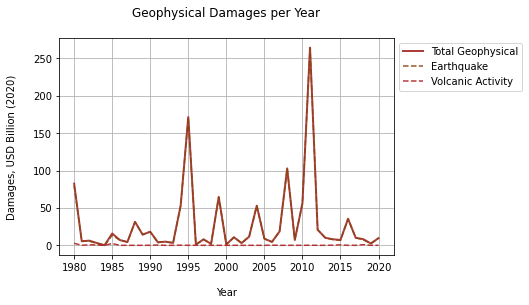

In [25]:
# single line plot

plt.grid(axis = 'both')
plt.title("Geophysical Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Damages, USD Billion (2020)\n")
plt.plot(geophysical_costs.index, geophysical_costs, linewidth=2, color = 'brown', alpha = 0.9, label = 'Total Geophysical')
plt.plot(earthquake_costs.index, earthquake_costs, linestyle = '--', color = 'saddlebrown', alpha = 0.9, label = 'Earthquake')
plt.plot(volcanic_costs.index, volcanic_costs, linestyle = '--', color = 'firebrick', alpha = 0.9, label = 'Volcanic Activity')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/geophysicalCostsPerYearSLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

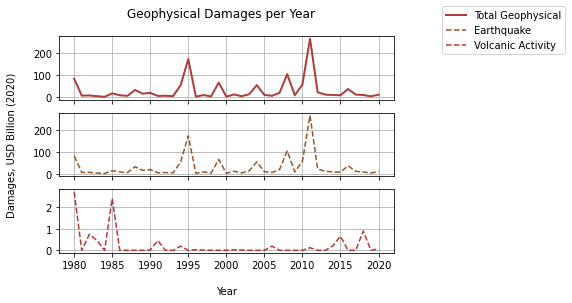

In [26]:
# multiple line plots

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Geophysical Damages per Year\n")
axs[1].set_ylabel("Damages, USD Billion (2020)\n")
axs[2].set_xlabel("\nYear")

axs[0].plot(geophysical_costs.index, geophysical_costs, linewidth=2, color = 'brown', alpha = 0.9, label = 'Total Geophysical')
axs[1].plot(earthquake_costs.index, earthquake_costs, linestyle = '--', color = 'saddlebrown', alpha = 0.9, label = 'Earthquake')
axs[2].plot(volcanic_costs.index, volcanic_costs, linestyle = '--', color = 'firebrick', alpha = 0.9, label = 'Volcanic Activity')

plt.sca(axs[0])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'both')

plt.sca(axs[1])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'both')

plt.sca(axs[2])
plt.yticks(np.linspace(0,2,3))
plt.grid(axis = 'both')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/geophysicalCostsPerYearMLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

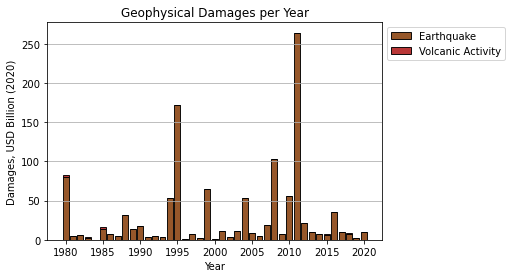

In [27]:
# single bar chart

plt.grid(axis = 'y')
plt.title("Geophysical Damages per Year")
plt.xlabel("Year")
plt.ylabel("Damages, USD Billion (2020)")

plt.bar(earthquake_costs.index, earthquake_costs, edgecolor = 'black', color = 'saddlebrown', alpha = 0.9, label = 'Earthquake')
plt.bar(volcanic_costs.index, volcanic_costs, bottom = earthquake_costs, edgecolor = 'black', color = 'firebrick', alpha = 0.9, label = 'Volcanic Activity')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/geophysicalCostsPerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

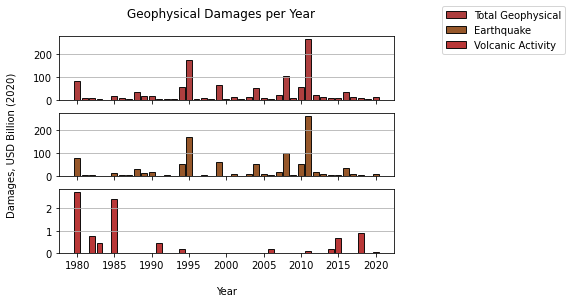

In [28]:
# multiple bar charts

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Geophysical Damages per Year\n")
axs[1].set_ylabel("Damages, USD Billion (2020)\n")
axs[2].set_xlabel("\nYear")

axs[0].bar(geophysical_costs.index, geophysical_costs, edgecolor = 'black', color = 'brown', alpha = 0.9, label = 'Total Geophysical')
axs[1].bar(earthquake_costs.index, earthquake_costs, edgecolor = 'black', color = 'saddlebrown', alpha = 0.9, label = 'Earthquake')
axs[2].bar(volcanic_costs.index, volcanic_costs, edgecolor = 'black', color = 'firebrick', alpha = 0.9, label = 'Volcanic Activity')

plt.sca(axs[0])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'y')

plt.sca(axs[1])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'y')

plt.sca(axs[2])
plt.yticks(np.linspace(0,2,3))
plt.grid(axis = 'y')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/geophysical Disasters/geophysical figures/geophysicalCostsPerYearMBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

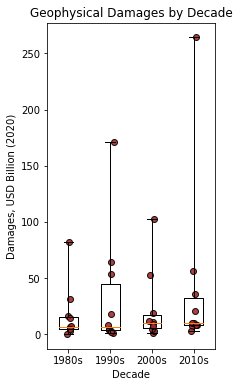

In [29]:
# BOXPLOT GEOPHYSICAL DISASTER COSTS

geophysical_box_data = [geophysical_costs[0:10], geophysical_costs[10:20], geophysical_costs[20:30], geophysical_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Geophysical Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Damages, USD Billion (2020)")

plt.boxplot(geophysical_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,geophysical_box_data[0], color = 'brown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,geophysical_box_data[1], color = 'brown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,geophysical_box_data[2], color = 'brown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,geophysical_box_data[3], color = 'brown', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/geophysicalCostsPerYearBOX.png", bbox_inches='tight')

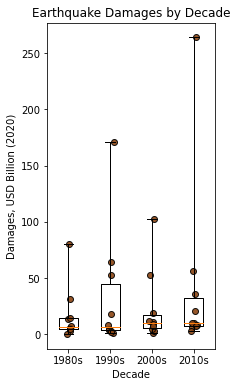

In [30]:
# BOXPLOT EARTHQUAKE COSTS

earthquake_box_data = [earthquake_costs[0:10], earthquake_costs[10:20], earthquake_costs[20:30], earthquake_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Earthquake Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Damages, USD Billion (2020)")

plt.boxplot(earthquake_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,earthquake_box_data[0], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,earthquake_box_data[1], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,earthquake_box_data[2], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,earthquake_box_data[3], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/earthquakeCostsPerYearBOX.png", bbox_inches='tight')

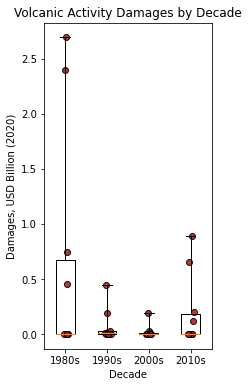

In [31]:
# BOXPLOT VOLCANIC ACTIVITY COSTS

volcanic_box_data = [volcanic_costs[0:10], volcanic_costs[10:20], volcanic_costs[20:30], volcanic_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Volcanic Activity Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Damages, USD Billion (2020)")

plt.boxplot(volcanic_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,volcanic_box_data[0], color = 'firebrick', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,volcanic_box_data[1], color = 'firebrick', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,volcanic_box_data[2], color = 'firebrick', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,volcanic_box_data[3], color = 'firebrick', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/volcanicActivityCostsPerYearBOX.png", bbox_inches='tight')

# GEOPHYSICAL DISASTER YEARLY DAMAGES STATISTICS

In [32]:
# GEOPHYSICAL DISASTER YEARLY DAMAGES STATISTICS

print("GEOPHYSICAL DISASTER YEARLY DAMAGES STATISTICS")

# geophysical disaster yearly damages (total statistics)
print("\nGeophysical disaster yearly damages (total statistics): ")
print(geophysical_costs.describe())

# geophysical disaster yearly damages (1980s statistics)
print("\nGeophysical disaster yearly damages (1980s statistics): ")
print(geophysical_costs[0:10].describe())

# geophysical disaster yearly damages (1990s statistics)
print("\nGeophysical disaster yearly damages (1990s statistics): ")
print(geophysical_costs[10:20].describe())

# geophysical disaster yearly damages (2000s statistics)
print("\nGeophysical disaster yearly damages (2000s statistics): ")
print(geophysical_costs[20:30].describe())

# geophysical disaster yearly damages (2010s statistics)
print("\nGeophysical disaster yearly damages (2010s statistics): ")
print(geophysical_costs[30:40].describe())

print("\n")

# GEOPHYSICAL DISASTER YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("GEOPHYSICAL DISASTER YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean geophysical disasters yearly damages (1980s-2010s)
total_mean_costs_1980s = geophysical_costs[0:10].mean()
total_mean_costs_2010s = geophysical_costs[30:40].mean()
mean_costs_percent_change_1980_to_2020 = 100*(total_mean_costs_2010s-total_mean_costs_1980s)/abs(total_mean_costs_1980s)
print("Change in mean geophysical disasters yearly damages (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_1980_to_2020))

# change in maximum geophysical disasters yearly damages (1980s-2010s)
total_max_costs_1980s = geophysical_costs[0:10].max()
total_max_costs_2010s = geophysical_costs[30:40].max()
max_costs_percent_change_1980_to_2020 = 100*(total_max_costs_2010s-total_max_costs_1980s)/abs(total_max_costs_1980s)
print("Change in maximum geophysical disasters yearly damages (1980s-2010s): {:.2f}%".format(max_costs_percent_change_1980_to_2020))

# change in minimum geophysical disasters yearly damages (1980s-2010s)
total_min_costs_1980s = geophysical_costs[0:10].min()
total_min_costs_2010s = geophysical_costs[30:40].min()
min_costs_percent_change_1980_to_2020 = 100*(total_min_costs_2010s-total_min_costs_1980s)/abs(total_min_costs_1980s)
print("Change in minimum geophysical disasters yearly damages (1980s-2010s): {:.2f}%".format(min_costs_percent_change_1980_to_2020))

# change in standard deviation of geophysical disasters yearly damages (1980s-2010s)
total_std_costs_1980s = geophysical_costs[0:10].std()
total_std_costs_2010s = geophysical_costs[30:40].std()
std_costs_percent_change_1980_to_2020 = 100*(total_std_costs_2010s-total_std_costs_1980s)/abs(total_std_costs_1980s)
print("Change in standard deviation of geophysical disasters yearly damages (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_1980_to_2020))

GEOPHYSICAL DISASTER YEARLY DAMAGES STATISTICS

Geophysical disaster yearly damages (total statistics): 
count     41.000000
mean      28.161210
std       50.500344
min        0.121696
25%        4.583419
50%        8.858584
75%       20.828011
max      264.260624
Name: Total Damages, dtype: float64

Geophysical disaster yearly damages (1980s statistics): 
count    10.000000
mean     17.038030
std      24.704008
min       0.121696
25%       4.664843
50%       6.661707
75%      15.462110
max      82.493915
Name: Total Damages, dtype: float64

Geophysical disaster yearly damages (1990s statistics): 
count     10.000000
mean      33.043633
std       53.679176
min        0.968632
25%        3.394277
50%        6.440068
75%       44.401994
max      171.476938
Name: Total Damages, dtype: float64

Geophysical disaster yearly damages (2000s statistics): 
count     10.000000
mean      22.157442
std       32.018048
min        1.164298
25%        5.251334
50%        9.805236
75%       16.866048
m

In [33]:
# EARTHQUAKE YEARLY DAMAGES STATISTICS

print("EARTHQUAKE YEARLY DAMAGES STATISTICS")

# earthquake yearly damages (total statistics)
print("\nEarthquake yearly damages (total statistics): ")
print(earthquake_costs.describe())

# earthquake yearly damages (1980s statistics)
print("\nEarthquake yearly damages (1980s statistics): ")
print(earthquake_costs[0:10].describe())

# earthquake yearly damages (1990s statistics)
print("\nEarthquake yearly damages (1990s statistics): ")
print(earthquake_costs[10:20].describe())

# earthquake yearly damages (2000s statistics)
print("\nEarthquake yearly damages (2000s statistics): ")
print(earthquake_costs[20:30].describe())

# earthquake yearly damages (2010s statistics)
print("\nEarthquake yearly damages (2010s statistics): ")
print(earthquake_costs[30:40].describe())

print("\n")

# EARTHQUAKE YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("EARTHQUAKE YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean earthquake yearly damages (1980s-2010s)
total_mean_costs_1980s = earthquake_costs[0:10].mean()
total_mean_costs_2010s = earthquake_costs[30:40].mean()
mean_costs_percent_change_1980_to_2020 = 100*(total_mean_costs_2010s-total_mean_costs_1980s)/abs(total_mean_costs_1980s)
print("Change in mean earthquake yearly damages (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_1980_to_2020))

# change in maximum earthquake yearly damages (1980s-2010s)
total_max_costs_1980s = earthquake_costs[0:10].max()
total_max_costs_2010s = earthquake_costs[30:40].max()
max_costs_percent_change_1980_to_2020 = 100*(total_max_costs_2010s-total_max_costs_1980s)/abs(total_max_costs_1980s)
print("Change in maximum earthquake yearly damages (1980s-2010s): {:.2f}%".format(max_costs_percent_change_1980_to_2020))

# change in minimum earthquake yearly damages (1980s-2010s)
total_min_costs_1980s = earthquake_costs[0:10].min()
total_min_costs_2010s = earthquake_costs[30:40].min()
min_costs_percent_change_1980_to_2020 = 100*(total_min_costs_2010s-total_min_costs_1980s)/abs(total_min_costs_1980s)
print("Change in minimum earthquake yearly damages (1980s-2010s): {:.2f}%".format(min_costs_percent_change_1980_to_2020))

# change in standard deviation of earthquake yearly damages (1980s-2010s)
total_std_costs_1980s = earthquake_costs[0:10].std()
total_std_costs_2010s = earthquake_costs[30:40].std()
std_costs_percent_change_1980_to_2020 = 100*(total_std_costs_2010s-total_std_costs_1980s)/abs(total_std_costs_1980s)
print("Change in standard deviation of earthquake yearly damages (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_1980_to_2020))

EARTHQUAKE YEARLY DAMAGES STATISTICS

Earthquake yearly damages (total statistics): 
count     41.000000
mean      27.938000
std       50.469857
min        0.121696
25%        4.397573
50%        8.858584
75%       20.828011
max      264.141341
Name: Total Damages, dtype: float64

Earthquake yearly damages (1980s statistics): 
count    10.000000
mean     16.409263
std      24.000178
min       0.121696
25%       4.664843
50%       6.291370
75%      14.087923
max      79.799264
Name: Total Damages, dtype: float64

Earthquake yearly damages (1990s statistics): 
count     10.000000
mean      32.973803
std       53.700970
min        0.941492
25%        3.281386
50%        6.433640
75%       44.254452
max      171.475716
Name: Total Damages, dtype: float64

Earthquake yearly damages (2000s statistics): 
count     10.000000
mean      22.134197
std       32.031870
min        1.160981
25%        5.107360
50%        9.793103
75%       16.866048
max      102.823453
Name: Total Damages, dtype: flo

In [34]:
# VOLCANIC ACTIVITY YEARLY DAMAGES STATISTICS

print("VOLCANIC ACTIVITY YEARLY DAMAGES STATISTICS")

# volcanic yearly damages (total statistics)
print("\nVolcanic activity yearly damages (total statistics): ")
print(volcanic_costs.describe())

# volcanic yearly damages (1980s statistics)
print("\nVolcanic activity yearly damages (1980s statistics): ")
print(volcanic_costs[0:10].describe())

# volcanic yearly damages (1990s statistics)
print("\nVolcanic activity yearly damages (1990s statistics): ")
print(volcanic_costs[10:20].describe())

# volcanic yearly damages (2000s statistics)
print("\nVolcanic activity yearly damages (2000s statistics): ")
print(volcanic_costs[20:30].describe())

# volcanic yearly damages (2010s statistics)
print("\nVolcanic activity yearly damages (2010s statistics): ")
print(volcanic_costs[30:40].describe())

print("\n")

# VOLCANIC ACTIVITY YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("VOLCANIC ACTIVITY YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean volcanic activity yearly damages (1980s-2010s)
total_mean_costs_1980s = volcanic_costs[0:10].mean()
total_mean_costs_2010s = volcanic_costs[30:40].mean()
mean_costs_percent_change_1980_to_2020 = 100*(total_mean_costs_2010s-total_mean_costs_1980s)/abs(total_mean_costs_1980s)
print("Change in mean volcanic activity yearly damages (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_1980_to_2020))

# change in maximum volcanic activity yearly damages (1980s-2010s)
total_max_costs_1980s = volcanic_costs[0:10].max()
total_max_costs_2010s = volcanic_costs[30:40].max()
max_costs_percent_change_1980_to_2020 = 100*(total_max_costs_2010s-total_max_costs_1980s)/abs(total_max_costs_1980s)
print("Change in maximum volcanic activity yearly damages (1980s-2010s): {:.2f}%".format(max_costs_percent_change_1980_to_2020))

# change in minimum volcanic activity yearly damages (1980s-2010s)
total_min_costs_1980s = volcanic_costs[0:10].min()
total_min_costs_2010s = volcanic_costs[30:40].min()
min_costs_percent_change_1980_to_2020 = 100*(total_min_costs_2010s-total_min_costs_1980s)/abs(total_min_costs_1980s)
print("Change in minimum volcanic activity yearly damages (1980s-2010s): {:.2f}%".format(min_costs_percent_change_1980_to_2020))

# change in standard deviation of volcanic activity yearly damages (1980s-2010s)
total_std_costs_1980s = volcanic_costs[0:10].std()
total_std_costs_2010s = volcanic_costs[30:40].std()
std_costs_percent_change_1980_to_2020 = 100*(total_std_costs_2010s-total_std_costs_1980s)/abs(total_std_costs_1980s)
print("Change in standard deviation of volcanic activity yearly damages (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_1980_to_2020))

VOLCANIC ACTIVITY YEARLY DAMAGES STATISTICS

Volcanic activity yearly damages (total statistics): 
count    41.000000
mean      0.223210
std       0.576308
min       0.000000
25%       0.000000
50%       0.000000
75%       0.119282
max       2.694651
Name: Total Damages, dtype: float64

Volcanic activity yearly damages (1980s statistics): 
count    10.000000
mean      0.628767
std       1.044302
min       0.000000
25%       0.000000
50%       0.000000
75%       0.668962
max       2.694651
Name: Total Damages, dtype: float64

Volcanic activity yearly damages (1990s statistics): 
count    10.000000
mean      0.069830
std       0.145527
min       0.000000
25%       0.000218
50%       0.007040
75%       0.024305
max       0.448951
Name: Total Damages, dtype: float64

Volcanic activity yearly damages (2000s statistics): 
count    10.000000
mean      0.023246
std       0.059827
min       0.000000
25%       0.000000
50%       0.000000
75%       0.010510
max       0.191965
Name: Total Damages,

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars


# YoY CHANGE IN GEOPHYSICAL DISASTER YEARLY DAMAGES ANALYSIS

In [35]:
# CALCULATE YoY CHANGE IN DISASTER COSTS

geophysical_costs_change = [geophysical_costs[i+1]-geophysical_costs[i] for i in range(1980,2020)]
geophysical_costs_change = pd.Series(geophysical_costs_change)

earthquake_costs_change = [earthquake_costs[i+1]-earthquake_costs[i] for i in range(1980,2020)]
earthquake_costs_change = pd.Series(earthquake_costs_change)

volcanic_costs_change = [volcanic_costs[i+1]-volcanic_costs[i] for i in range(1980,2020)]
volcanic_costs_change = pd.Series(volcanic_costs_change)

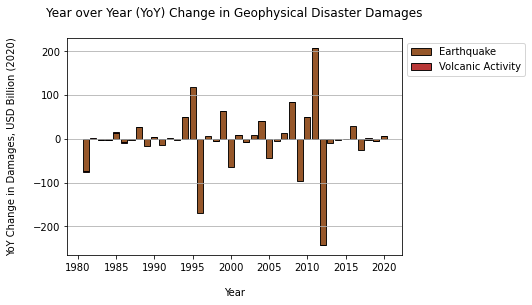

In [36]:
# single bar chart

costs_change_data = np.array([earthquake_costs_change, volcanic_costs_change])

data_shape = np.shape(costs_change_data)

# Take negative and positive data apart and cumulate
def get_cumulated_array(costs_change_data, **kwargs):
    cum = costs_change_data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(costs_change_data))
    d[1:] = cum[:-1]
    return d  

cumulated_data = get_cumulated_array(costs_change_data, min=0)
cumulated_data_neg = get_cumulated_array(costs_change_data, max=0)

# Re-merge negative and positive data.
row_mask = (costs_change_data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

cols = ["saddlebrown", "firebrick"]
labs = ["Earthquake", "Volcanic Activity"]

#fig = plt.figure(figsize=(5,20))
ax = plt.subplot(111)

for i in np.arange(0, data_shape[0]):
    ax.bar(range(1981, 2021), costs_change_data[i], bottom=data_stack[i], edgecolor = 'black', color=cols[i], alpha = 0.9, label = labs[i])

plt.grid(axis = 'y')

plt.title("Year over Year (YoY) Change in Geophysical Disaster Damages\n")
plt.xlabel("\nYear")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/geophysicalDisasterCostsChangePerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

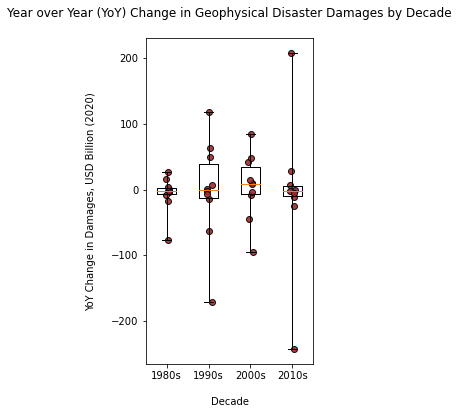

In [37]:
# YoY CHANGE IN GEOPHYSICAL COSTS BOXPLOT

total_box_cost_data = [geophysical_costs_change[0:10], geophysical_costs_change[10:20], geophysical_costs_change[20:30], geophysical_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Geophysical Disaster Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'brown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'brown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'brown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'brown', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/geophysicalCostsChangePerYearBOX.png", bbox_inches='tight')


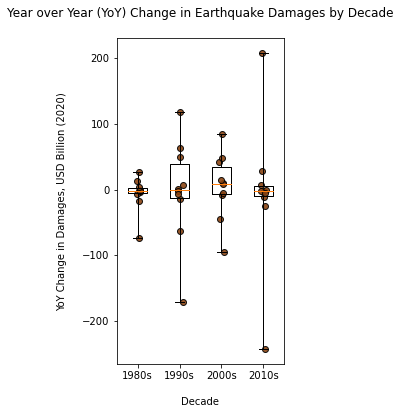

In [38]:
# YoY CHANGE IN EARTHQUAKE COSTS BOXPLOT

total_box_cost_data = [earthquake_costs_change[0:10], earthquake_costs_change[10:20], earthquake_costs_change[20:30], earthquake_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Earthquake Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'saddlebrown', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/earthquakeCostsChangePerYearBOX.png", bbox_inches='tight')


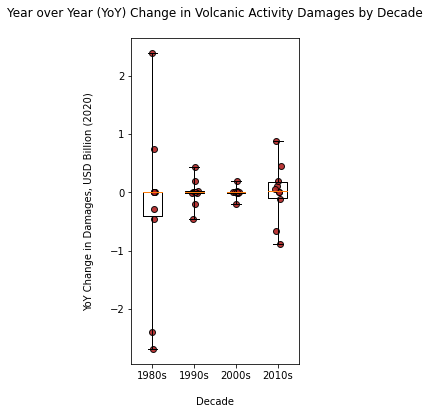

In [39]:
# YoY CHANGE IN VOLCANIC ACTIVITY COSTS BOXPLOT

total_box_cost_data = [volcanic_costs_change[0:10], volcanic_costs_change[10:20], volcanic_costs_change[20:30], volcanic_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Volcanic Activity Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'firebrick', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'firebrick', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'firebrick', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'firebrick', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Geophysical Disasters/geophysical figures/volcanicCostsChangePerYearBOX.png", bbox_inches='tight')


# YoY CHANGE IN GEOPHYSICAL DISASTER YEARLY DAMAGES STATISTICS

In [40]:
# YoY CHANGE IN GEOPHYSICAL DISASTER DAMAGES STATISTICS

print("YoY CHANGE IN GEOPHYSICAL DISASTER DAMAGES STATISTICS")

# YoY change in geophysical disaster damages (total statistics)
print("\nYoY change in geophysical disaster damages (total statistics): ")
print(geophysical_costs_change.describe())

# YoY change in geophysical disaster damages (1980s statistics)
print("\nYoY change in geophysical disaster damages (1980s statistics): ")
print(geophysical_costs_change[0:10].describe())

# YoY change in geophysical disaster damages (1990s statistics)
print("\nYoY change in geophysical disaster damages (1990s statistics): ")
print(geophysical_costs_change[10:20].describe())

# YoY change in geophysical disaster damages (2000s statistics)
print("\nYoY change in geophysical disaster damages (2000s statistics): ")
print(geophysical_costs_change[20:30].describe())

# YoY change in geophysical disaster damages (2010s statistics)
print("\nYoY change in geophysical disaster damages (2010s statistics): ")
print(geophysical_costs_change[30:40].describe())

print("\n")

# YoY CHANGE IN GEOPHYSICAL DISASTER DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN GEOPHYSICAL DISASTER DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in geophysical disasters damages (1980s-2010s)
total_mean_1980s = geophysical_costs_change[0:10].mean()
total_mean_2010s = geophysical_costs_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Change in mean YoY change in geophysical disasters damages (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

# change in maximum YoY change in geophysical disasters damages (1980s-2010s)
total_max_1980s = geophysical_costs_change[0:10].max()
total_max_2010s = geophysical_costs_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Change in maximum YoY change in geophysical disasters damages (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

# change in minimum YoY change in geophysical disasters damages (1980s-2010s)
total_min_1980s = geophysical_costs_change[0:10].min()
total_min_2010s = geophysical_costs_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Change in minimum YoY change in geophysical disasters damages (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in geophysical disasters damages (1980s-2010s)
total_std_1980s = geophysical_costs_change[0:10].std()
total_std_2010s = geophysical_costs_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Change in standard deviation of YoY change in geophysical disasters damages (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

YoY CHANGE IN GEOPHYSICAL DISASTER DAMAGES STATISTICS

YoY change in geophysical disaster damages (total statistics): 
count     40.000000
mean      -1.821911
std       69.429052
min     -243.432613
25%       -9.258076
50%       -1.826116
75%       14.467025
max      208.300866
dtype: float64

YoY change in geophysical disaster damages (1980s statistics): 
count    10.000000
mean     -6.431340
std      27.706211
min     -77.027263
25%      -7.383326
50%      -2.785550
75%       3.103713
max      27.022079
dtype: float64

YoY change in geophysical disaster damages (1990s statistics): 
count     10.000000
mean      -1.701622
std       77.306004
min     -170.508306
25%      -12.081439
50%       -0.463056
75%       39.238078
max      118.334450
dtype: float64

YoY change in geophysical disaster damages (2000s statistics): 
count    10.000000
mean      5.479546
std      49.880426
min     -95.568375
25%      -6.898822
50%       9.091302
75%      34.548131
max      84.193232
dtype: float64

Y

In [41]:
# YoY CHANGE IN EARTHQUAKE DAMAGES STATISTICS

print("YoY CHANGE IN EARTHQUAKE DAMAGES STATISTICS")

# YoY change in earthquake damages (total statistics)
print("\nYoY change in earthquake damages (total statistics): ")
print(earthquake_costs_change.describe())

# YoY change in earthquake damages (1980s statistics)
print("\nYoY change in earthquake damages (1980s statistics): ")
print(earthquake_costs_change[0:10].describe())

# YoY change in earthquake damages (1990s statistics)
print("\nYoY change in earthquake damages (1990s statistics): ")
print(earthquake_costs_change[10:20].describe())

# YoY change in earthquake damages (2000s statistics)
print("\nYoY change in earthquake damages (2000s statistics): ")
print(earthquake_costs_change[20:30].describe())

# YoY change in earthquake damages (2010s statistics)
print("\nYoY change in earthquake damages (2010s statistics): ")
print(earthquake_costs_change[30:40].describe())

print("\n")

# YoY CHANGE IN EARTHQUAKE DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN EARTHQUAKE DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in earthquake damages (1980s-2010s)
total_mean_1980s = earthquake_costs_change[0:10].mean()
total_mean_2010s = earthquake_costs_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Change in mean YoY change in earthquake damages (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

# change in maximum YoY change in earthquake damages (1980s-2010s)
total_max_1980s = earthquake_costs_change[0:10].max()
total_max_2010s = earthquake_costs_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Change in maximum YoY change in earthquake damages (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

# change in minimum YoY change in earthquake damages (1980s-2010s)
total_min_1980s = earthquake_costs_change[0:10].min()
total_min_2010s = earthquake_costs_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Change in minimum YoY change in earthquake damages (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in earthquake damages (1980s-2010s)
total_std_1980s = earthquake_costs_change[0:10].std()
total_std_2010s = earthquake_costs_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Change in standard deviation of YoY change in earthquake damages (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

YoY CHANGE IN EARTHQUAKE DAMAGES STATISTICS

YoY change in earthquake damages (total statistics): 
count     40.000000
mean      -1.756189
std       69.331346
min     -243.313331
25%       -8.504524
50%       -2.004080
75%       13.556575
max      208.181584
dtype: float64

YoY change in earthquake damages (1980s statistics): 
count    10.000000
mean     -6.163455
std      26.715961
min     -74.332612
25%      -5.512728
50%      -2.558636
75%       2.906694
max      27.022079
dtype: float64

YoY change in earthquake damages (1990s statistics): 
count     10.000000
mean      -1.700373
std       77.341007
min     -170.534223
25%      -12.403088
50%       -0.239017
75%       39.098710
max      118.524684
dtype: float64

YoY change in earthquake damages (2000s statistics): 
count    10.000000
mean      5.479878
std      49.887906
min     -95.568375
25%      -6.938295
50%       9.087282
75%      34.596123
max      84.193232
dtype: float64

YoY change in earthquake damages (2010s statistics)

In [42]:
# YoY CHANGE IN VOLCANIC ACTIVITY DAMAGES STATISTICS

print("YoY CHANGE IN VOLCANIC ACTIVITY DAMAGES STATISTICS")

# YoY change in volcanic damages (total statistics)
print("\nYoY change in volcanic activity damages (total statistics): ")
print(volcanic_costs_change.describe())

# YoY change in volcanic damages (1980s statistics)
print("\nYoY change in volcanic activity damages (1980s statistics): ")
print(volcanic_costs_change[0:10].describe())

# YoY change in volcanic damages (1990s statistics)
print("\nYoY change in volcanic activity damages (1990s statistics): ")
print(volcanic_costs_change[10:20].describe())

# YoY change in volcanic damages (2000s statistics)
print("\nYoY change in volcanic activity damages (2000s statistics): ")
print(volcanic_costs_change[20:30].describe())

# YoY change in volcanic damages (2010s statistics)
print("\nYoY change in volcanic activity damages (2010s statistics): ")
print(volcanic_costs_change[30:40].describe())

print("\n")

# YoY CHANGE IN VOLCANIC ACTIVITY DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN VOLCANIC ACTIVITY DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in volcanic activity damages (1980s-2010s)
total_mean_1980s = volcanic_costs_change[0:10].mean()
total_mean_2010s = volcanic_costs_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Change in mean YoY change in volcanic activity damages (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

# change in maximum YoY change in volcanic activity damages (1980s-2010s)
total_max_1980s = volcanic_costs_change[0:10].max()
total_max_2010s = volcanic_costs_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Change in maximum YoY change in volcanic activity damages (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

# change in minimum YoY change in volcanic activity damages (1980s-2010s)
total_min_1980s = volcanic_costs_change[0:10].min()
total_min_2010s = volcanic_costs_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Change in minimum YoY change in volcanic activity damages (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in volcanic activity damages (1980s-2010s)
total_std_1980s = volcanic_costs_change[0:10].std()
total_std_2010s = volcanic_costs_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Change in standard deviation of YoY change in volcanic activity damages (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

YoY CHANGE IN VOLCANIC ACTIVITY DAMAGES STATISTICS

YoY change in volcanic activity damages (total statistics): 
count    40.000000
mean     -0.065722
std       0.755563
min      -2.694651
25%      -0.040532
50%       0.000000
75%       0.035885
max       2.398515
dtype: float64

YoY change in volcanic activity damages (1980s statistics): 
count    10.000000
mean     -0.267885
std       1.448615
min      -2.694651
25%      -0.412082
50%       0.000000
75%       0.011850
max       2.398515
dtype: float64

YoY change in volcanic activity damages (1990s statistics): 
count    10.000000
mean     -0.001248
std       0.226746
min      -0.448951
25%      -0.013926
50%       0.000436
75%       0.020267
max       0.433151
dtype: float64

YoY change in volcanic activity damages (2000s statistics): 
count    10.000000
mean     -0.000332
std       0.090942
min      -0.191965
25%      -0.008518
50%       0.000000
75%       0.000000
max       0.191965
dtype: float64

YoY change in volcanic activity 